# Taller 11 - NLP - Análisis de Sentimientos

### Diana Patricia Rodríguez González

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [1]:
import pandas as pd

from googletrans import Translator

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

data = pd.read_csv('tweetspeakyblinders_20201108.csv')
data.head()

tweet                 date  \
0  @liquid_ed Pero por supuesto, dale otra oportu...  2020-11-08 00:13:48   
1  Mood: viendo Peaky Blinders con ganas de fumar...  2020-11-06 05:18:16   
2  @NetflixLAT piden demasiado 🤪😅  que info puede...  2020-11-06 02:12:05   
3  Bueno igual esta mierda la sabremos por allá h...  2020-11-04 02:08:38   
4  La banda sonora de Peaky Blinders me tiene con...  2020-11-04 01:04:16   

     city       user_location                   id  \
0  Bogotá  Bogotá - Colombia.  1325230000572919808   
1  Bogotá              Bogotá  1324581847460913152   
2  Bogotá     bogota,colombia  1324534992643543041   
3  Bogotá             Bogotá   1323809348003500032   
4  Bogotá   Bogotá - Colombia  1323793152055103494   

                                                link  
0  https://twitter.com/i/web/status/1325230000572...  
1  https://twitter.com/i/web/status/1324581847460...  
2  https://twitter.com/i/web/status/1324534992643...  
3  https://twitter.com/i/web/status/1323809348003...  
4  https://twitter.com/i/web/status/1323793152055...

In [2]:
translator = Translator()
data['ing'] = data['tweet'].apply(lambda valor: translator.translate(valor, src='es', dest='en')) 
data.head() 

tweet                 date  \
0  @liquid_ed Pero por supuesto, dale otra oportu...  2020-11-08 00:13:48   
1  Mood: viendo Peaky Blinders con ganas de fumar...  2020-11-06 05:18:16   
2  @NetflixLAT piden demasiado 🤪😅  que info puede...  2020-11-06 02:12:05   
3  Bueno igual esta mierda la sabremos por allá h...  2020-11-04 02:08:38   
4  La banda sonora de Peaky Blinders me tiene con...  2020-11-04 01:04:16   

     city       user_location                   id  \
0  Bogotá  Bogotá - Colombia.  1325230000572919808   
1  Bogotá              Bogotá  1324581847460913152   
2  Bogotá     bogota,colombia  1324534992643543041   
3  Bogotá             Bogotá   1323809348003500032   
4  Bogotá   Bogotá - Colombia  1323793152055103494   

                                                link  \
0  https://twitter.com/i/web/status/1325230000572...   
1  https://twitter.com/i/web/status/1324581847460...   
2  https://twitter.com/i/web/status/1324534992643...   
3  https://twitter.com/i/web/status/1323809348003...   
4  https://twitter.com/i/web/status/1323793152055...   

                                                 ing  
0  Translated(src=es, dest=en, text=@liquid_ed Bu...  
1  Translated(src=es, dest=en, text=Mood: watchin...  
2  Translated(src=es, dest=en, text=@NetflixLAT t...  
3  Translated(src=es, dest=en, text=Well, we will...  
4  Translated(src=es, dest=en, text=The Peaky Bli...

In [3]:
data['ingles'] = data['ing'].apply(lambda valor: valor.text)
data.head()

tweet                 date  \
0  @liquid_ed Pero por supuesto, dale otra oportu...  2020-11-08 00:13:48   
1  Mood: viendo Peaky Blinders con ganas de fumar...  2020-11-06 05:18:16   
2  @NetflixLAT piden demasiado 🤪😅  que info puede...  2020-11-06 02:12:05   
3  Bueno igual esta mierda la sabremos por allá h...  2020-11-04 02:08:38   
4  La banda sonora de Peaky Blinders me tiene con...  2020-11-04 01:04:16   

     city       user_location                   id  \
0  Bogotá  Bogotá - Colombia.  1325230000572919808   
1  Bogotá              Bogotá  1324581847460913152   
2  Bogotá     bogota,colombia  1324534992643543041   
3  Bogotá             Bogotá   1323809348003500032   
4  Bogotá   Bogotá - Colombia  1323793152055103494   

                                                link  \
0  https://twitter.com/i/web/status/1325230000572...   
1  https://twitter.com/i/web/status/1324581847460...   
2  https://twitter.com/i/web/status/1324534992643...   
3  https://twitter.com/i/web/status/1323809348003...   
4  https://twitter.com/i/web/status/1323793152055...   

                                                 ing  \
0  Translated(src=es, dest=en, text=@liquid_ed Bu...   
1  Translated(src=es, dest=en, text=Mood: watchin...   
2  Translated(src=es, dest=en, text=@NetflixLAT t...   
3  Translated(src=es, dest=en, text=Well, we will...   
4  Translated(src=es, dest=en, text=The Peaky Bli...   

                                              ingles  
0  @liquid_ed But of course, give it another chan...  
1  Mood: watching Peaky Blinders wanting to smoke...  
2  @NetflixLAT they ask too much 🤪😅 what info can...  
3  Well, we will know this shit there until Thurs...  
4  The Peaky Blinders soundtrack has me wanting t...

In [4]:
data['sentimiento'] = data['ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data.head()

tweet                 date  \
0  @liquid_ed Pero por supuesto, dale otra oportu...  2020-11-08 00:13:48   
1  Mood: viendo Peaky Blinders con ganas de fumar...  2020-11-06 05:18:16   
2  @NetflixLAT piden demasiado 🤪😅  que info puede...  2020-11-06 02:12:05   
3  Bueno igual esta mierda la sabremos por allá h...  2020-11-04 02:08:38   
4  La banda sonora de Peaky Blinders me tiene con...  2020-11-04 01:04:16   

     city       user_location                   id  \
0  Bogotá  Bogotá - Colombia.  1325230000572919808   
1  Bogotá              Bogotá  1324581847460913152   
2  Bogotá     bogota,colombia  1324534992643543041   
3  Bogotá             Bogotá   1323809348003500032   
4  Bogotá   Bogotá - Colombia  1323793152055103494   

                                                link  \
0  https://twitter.com/i/web/status/1325230000572...   
1  https://twitter.com/i/web/status/1324581847460...   
2  https://twitter.com/i/web/status/1324534992643...   
3  https://twitter.com/i/web/status/1323809348003...   
4  https://twitter.com/i/web/status/1323793152055...   

                                                 ing  \
0  Translated(src=es, dest=en, text=@liquid_ed Bu...   
1  Translated(src=es, dest=en, text=Mood: watchin...   
2  Translated(src=es, dest=en, text=@NetflixLAT t...   
3  Translated(src=es, dest=en, text=Well, we will...   
4  Translated(src=es, dest=en, text=The Peaky Bli...   

                                              ingles  sentimiento  
0  @liquid_ed But of course, give it another chan...       0.3612  
1  Mood: watching Peaky Blinders wanting to smoke...       0.0000  
2  @NetflixLAT they ask too much 🤪😅 what info can...      -0.2824  
3  Well, we will know this shit there until Thurs...      -0.4854  
4  The Peaky Blinders soundtrack has me wanting t...      -0.3400

###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [6]:
## Organizar por sentimiento
data[['tweet', 'sentimiento']].sort_values('sentimiento')

tweet  sentimiento
172  “No hay descanso para mí en este mundo. Tal ve...      -0.9081
16   “No hay descanso para mí en este mundo. Tal ve...      -0.9081
130  @suriheartless Depende de la situación, hace p...      -0.6597
176  @suriheartless Depende de la situación, hace p...      -0.6597
89   Los malditos Peaky Blinders!!! https://t.co/ur...      -0.5826
..                                                 ...          ...
129  amo mas a Peaky Blinders de lo que me amo a mi...       0.8646
43   amo mas a Peaky Blinders de lo que me amo a mi...       0.8646
151  El man de Peaky Blinders es tan guapo Diosito😍...       0.9606
182  El man de Peaky Blinders es tan guapo Diosito😍...       0.9606
192  El man de Peaky Blinders es tan guapo Diosito😍...       0.9606

[193 rows x 2 columns]

In [7]:
#El tuit más positivo:
data.loc[192]['tweet']

'El man de Peaky Blinders es tan guapo Diosito😍😍😍😍😍 THOSE CHEEKBONES🤤🤤🤤 https://t.co/RzW2c3iSP5'

In [10]:
#El tuit más negativo:
data.loc[172]['tweet']

'“No hay descanso para mí en este mundo. Tal vez en el siguiente...\nSaben, caballeros. Está el infierno, y hay otro lugar debajo del infierno.”\n-Thomas Shelby (Peaky Blinders)'

###  `[15 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [12]:
data[['sentimiento']].count()

sentimiento    193
dtype: int64

In [33]:
#Cantidad tuits positivos
sum(data['sentimiento']>0)

90

In [34]:
#Cantidad tuits negativos
sum(data['sentimiento']<0)

43

In [35]:
#Cantidad tuits neutros
sum(data['sentimiento']==0)

60

###  `[BONUS 5pts]` : Diagrama de barras de la pregunta 3

###  `[BONUS 7pts]` : Nubes de palabras por sentimiento

In [46]:
import numpy as np

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

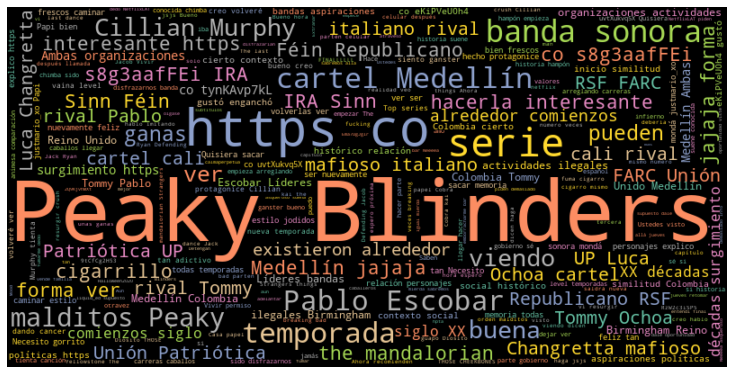

In [47]:
palabras = data.tweet.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='black', colormap='Set2',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

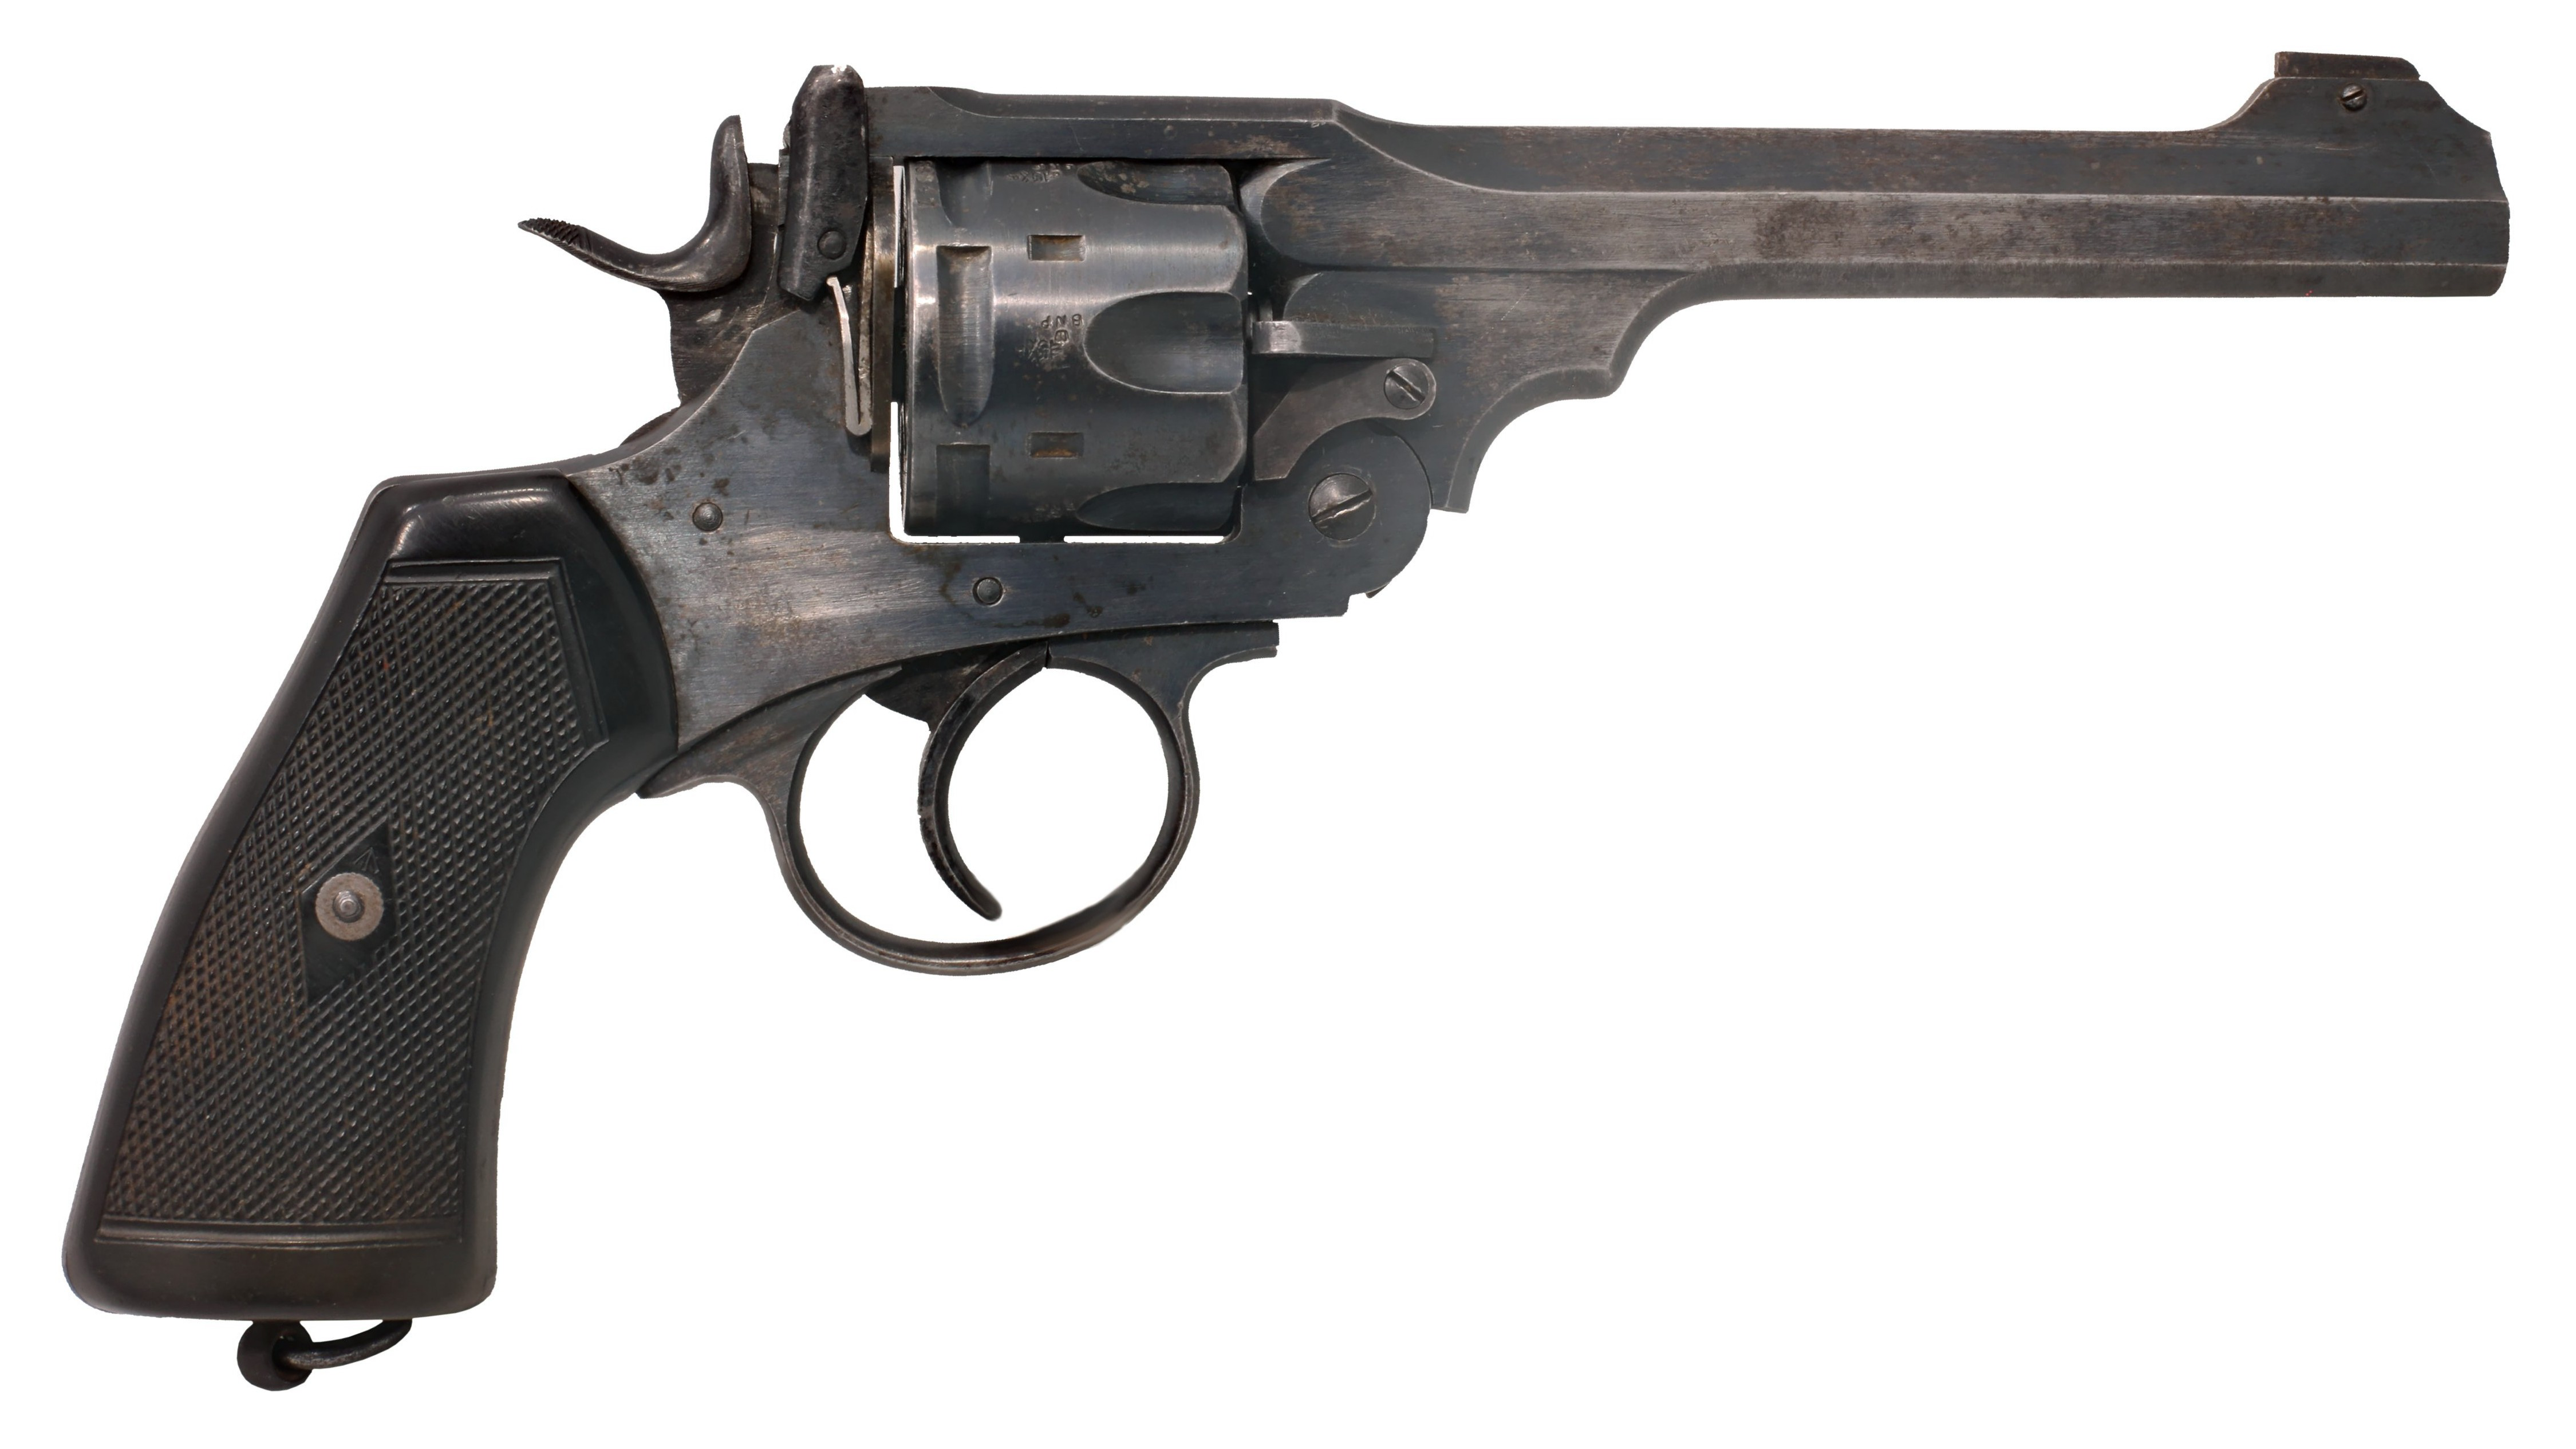

In [69]:
plantilla = PIL.Image.open("revolver1920.jpg")
display(plantilla)

In [70]:
mask = np.array(plantilla)

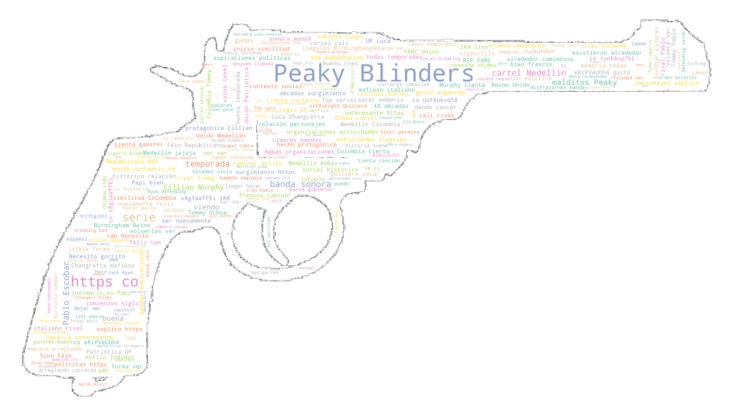

In [73]:
palabras = data.tweet.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='Set2',
                     stopwords=stopwords,
                     mask=mask, contour_width=0.5, contour_color='black').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("peaky_blinders_mod.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()